## Data science pipeline: pandas, seborn, scikit-learn

* How do I use **pandas library** to read data into Python?
* How do I use **seaborn library** to visualize data?
* What is **linear regression** and how does it work?
* How do I train and interpret a linear regression model in scikit-learn?
* What are some **evaluation metrics** for regression problems?
* How do I choose **which features** to include in my model

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [8]:
data.shape

(200, 5)

**IMPORTANT**: To see some help from some functions locate the cursor within the parenthesis and the press shift + Tab twice

In [9]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=None, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression: 'CompressionOptions' = 'infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_li

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv",index_col=0)

In [11]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### What are the features?

* **TV**. The amount spent on TV adds in advertising (in dollars)
* **Radio**. The amount spent on Radio adds in advertising (in dollars)
* **Newspaper**. The amount spent on Newspaper adds in advertising (in dollars)

### What is the response?

* **Sales**. Sales of a single product in a given market (in thousands of items)

This is a **regression problem** since the response is continuous.
We have 200 observations (rows), and each observation is a single market.

## Visualize data using seaborn

**Seaborn** Python library for statistical data visualization built on top of matplotlib.

In [12]:
import seaborn as sns

#Make sure plots can appear within the notebook
%matplotlib inline

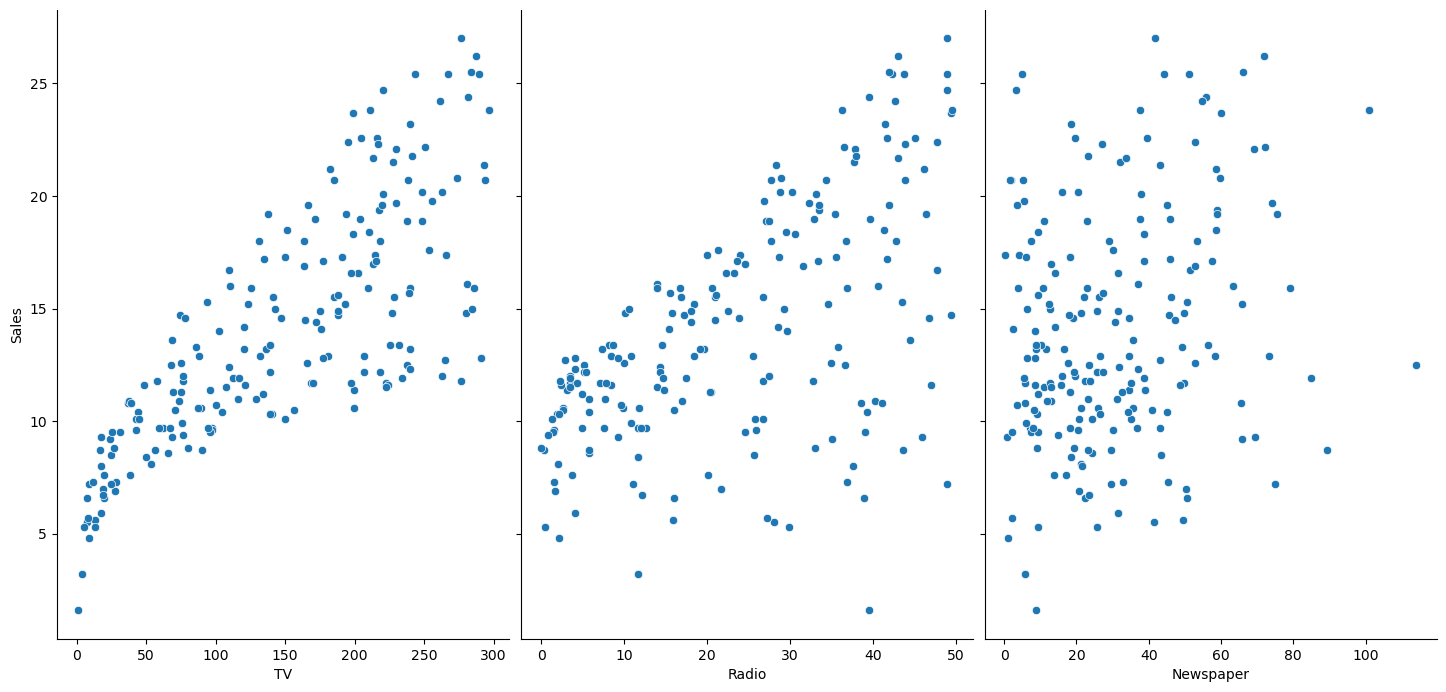

In [16]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height = 7, aspect = 0.7)

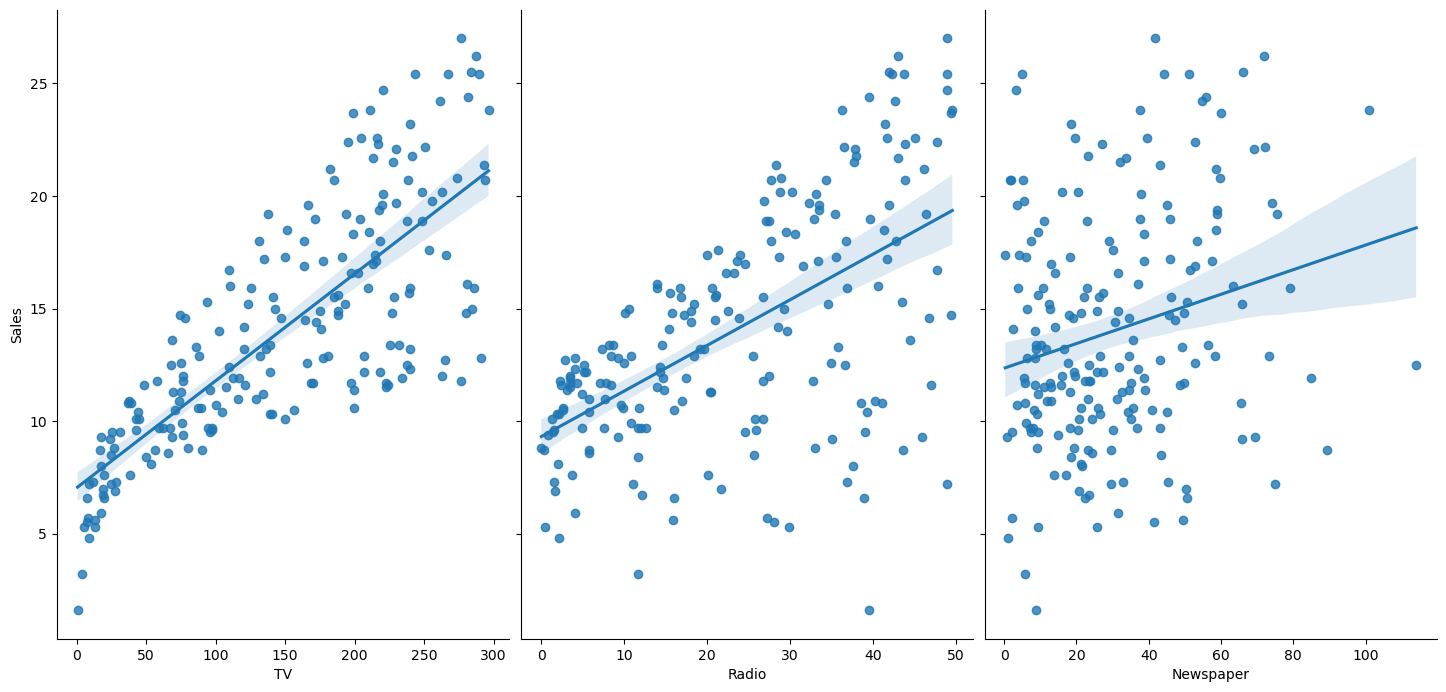

In [17]:
#We can add the relationship by adding one parameter
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height = 7, aspect = 0.7, kind = "reg")

Before we proceed we emphazise that **Regression** in ML is just a type of Supervised Learning Process in which the response is continuous.

**Linear Regression** is a particular ML model that can be used for Regression problems.

## Linear Regression

**Pros**. It runs quickly, no tuning required, highly interpretable, well_understood (vast amount of literature.

**Cons**. Unlikely to produce the best predictive accuracy (presumes linear relationship between the features and the response.

**Form of linear regression**

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

* $y$ is the response
* $\beta_0$ is the intercept
* $\beta_1$ is the  coefficient for $x_1$ (the first feature)
* $\beta_n$ is the  coefficient for $x_n$ (the nth feature)


The $\beta$ values are called **the model coefficients**. These values are learned during the model fitting step using the "least squares" criterion. It defines the best line as the one that minimizes the squared distances between each point and the line.

## Preparing X and y using pandas

* scikit learn expects X (feature matrix) and y (response vector) to be NumPy arrays
* However, pandas is built on top of NumPy
* Thus, X can be a pandas DataFrame and y can be a pandas Series.

In [18]:
feature_cols = ['TV', 'Radio', 'Newspaper']

X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [19]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

## Splitting X and y into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [22]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(150, 3) (50, 3)
(150,) (50,)


## Linear Regression in scikit learn

In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [25]:
print(linreg.intercept_)
print(linreg.coef_)

3.094010860844463
[0.04585077 0.17764264 0.00247669]


So the model is:
$$
y = 3.094 + 0.046 \times TV + 0.178 \times Radio + 0.002 \times Newspaper
$$

We interpret this as follows:

* Each **unit** increase In TV ad spending there is associated with a 0.046 **unit** increase on sales.
* More clearly, for a given amount of Radio and Newspaper ad spending, andditional  1,000 spent on TV ads is associated with an increase in sales of 46.6 items

Machine Learning Models focuses on association rather thab causation

The coefficients are stored in the same order that appear in the feature matrix X. To remember that order we can use zip

In [31]:
print(list(zip(feature_cols, linreg.coef_)))

[('TV', 0.04585077265765413), ('Radio', 0.17764264455697568), ('Newspaper', 0.002476692459638958)]


## Making predictions

In [32]:
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values.

## Model evaluation metrics for regression

Some common evaluation metrics for regression problems are:

* **Mean Absolute Error (MAE)** is the mean of absolute errors:

$$
\frac{1}{n}\sum_{i=1}^{n} \left|y_i- \hat{y}_i\right|
$$


In [34]:
#Example
true_vals = [100, 50, 30, 20]
pred_vals = [90, 45, 25, 20]
#We can get the metric from scikit learn modules
from sklearn import metrics

print(metrics.mean_absolute_error(true_vals, pred_vals))

5.0


* **Mean Squared Error (MSE)** is the mean of the squared errors:

$$
\frac{1}{n}\sum_{i=1}^{n} \left(y_i- \hat{y}_i\right)^2
$$

This is a bit harder to interpret so we use Root Mean Squared Error (RMSE) instead, which nothing but the square root of MSE.

In [39]:
print(metrics.mean_squared_error(true_vals, pred_vals))

6.123724356957945


* **Root Mean Squared Error (MSE)** is the mean of the squared errors:

$$
\sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(y_i- \hat{y}_i\right)^2}
$$

This is a bit harder to interpret so we use Root Mean Squared Error (RMSE) instead, which nothing but the square root of MSE.

In [ ]:
print(np.sqrt(metrics.mean_squared_error(true_vals, pred_vals)))

### Comparing these metrics

* MAE is the easiest to understand, because it is the average error.
* MSE is more popular because it punishes larger errors.
* RMSE is even more popular because it is interpretable in "y" units.

## Choosing an evaluation metric

In [41]:
#Suppose we chose the RMSE as the evaluation metric

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4459051240315897


## Feature selection

Train test split can help us with feature selection.
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE.

In [43]:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]

y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4364054578775054


The RMSE decreased when we dropped the Newpaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better) Thus, it is unlikely that this feature is useful for predicting Sales and should be removed from the model.

We can repeat this process for different combinations and choose the one with the lowest RMSE as the best combination of features for the task of regression.